# Extracting Neuraly Relevant Information from the Shape of the Hemodynamic Response
## Note on the construction of this document
This documentation was constructed retrospectively to accompany manuscrpit publication (thesis).
It initially aimed to be a walk-through of the three neuroimaging data sets acquired during my PhD. It however ended-up focusing on the main dataset used in my thesis.
## Abstract
## Context
## Working Model and Hypothesis

## Experimental Approach and Data Acquisition
### Stimuli
### Functional MRI Paradigm
In each 
Stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.Stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.

Please get the data from the repo if not done already
data repo: /Users/sebastienproulx/OneDrive - McGill University/dataBig
IN: anatomical V1 roi (C-derived/DecodingHR/anat/z)
IN: preprocessed functionals (C-derived/DecodingHR/fun/x)
IN: stimulus timing (B-clean/DecodingHR/stim/160118_cyclicStim/data)
F(IN)=OUT: 2-df sinusoidal fit to single voxel time series
OUT: fit params and stats + HRF estimates (C-derived/DecodingHR/fun/y)
Not actually running because way too long
/Users/sebastienproulx/OneDrive - McGill University/dataBig/C-derived/DecodingHR/fun/y/designMatrices.fig


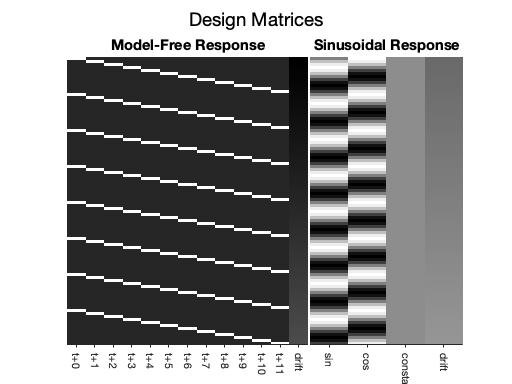

In [1]:
clear all
addpath(genpath(fullfile(pwd,'matlabFun')));
runFit

IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: voxel visual field eccentricity (C-derived\DecodingHR\anat\z)
IN: sinusoidal fit results (C-derived\DecodingHR\fun\y)
F(IN)=OUT: masks the fit according to voxel eccentricity and activation level
Figures are additionally thresholded for activation level, but not the data that is saved!
OUT: sinusoidal fit results (C-derived\DecodingHR\fun\zSin)
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/maskSinAndHrFit/02jp.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/maskSinAndHrFit/02jp.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/maskSinAndHrFit/03sk.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/maskSinAndHrFit/03sk.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/maskSinAndHrFit/04sp.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/maskSinAndHrFit/04sp.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/maskSinAndHrFit/05bm.svg
/U

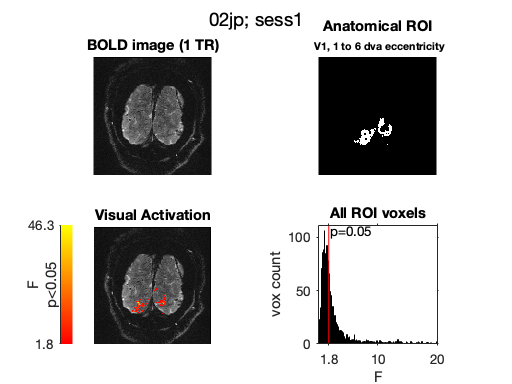

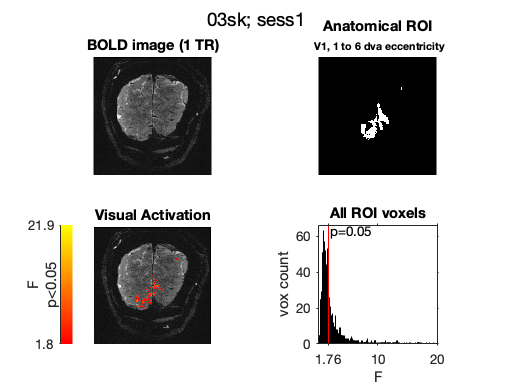

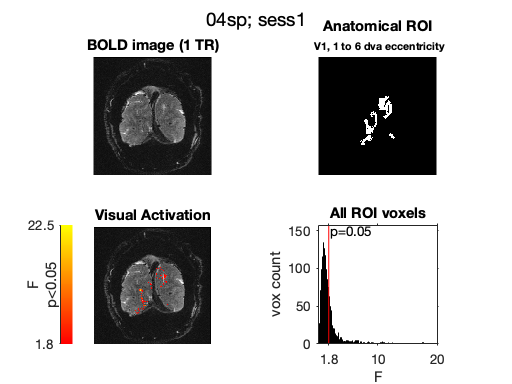

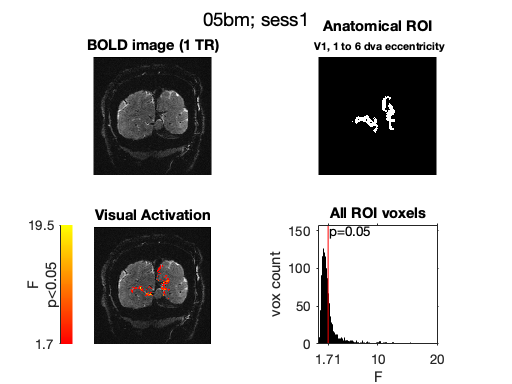

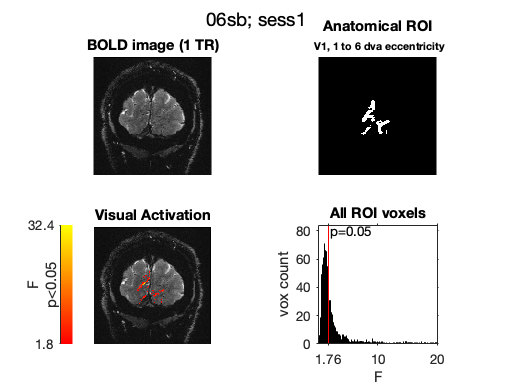

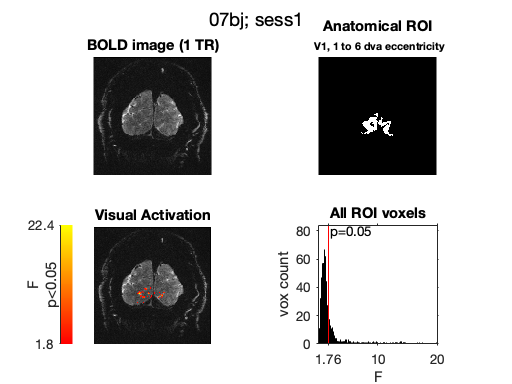

In [2]:
maskSinAndHrFit

## Prediction 1: Competing stimuli will evoke a smaller and more delayed HR

### Compare responses evoked by different stimuli

IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
threshVal=0.05
adjVoxDelay=0
F(IN)=OUT: threshold included voxels and analyse responses averaged across the ROI
OUT: figures and stats
> In legend>process_inputs (line 596)
In legend>make_legend (line 328)
In legend (line 272)
In sinusoidalGroupAnalysis (line 153)
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/02jp.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/02jp.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/03sk.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/03sk.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/04sp.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/04sp.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/sinusoidalGroupAnalysis/05bm.svg
/Us

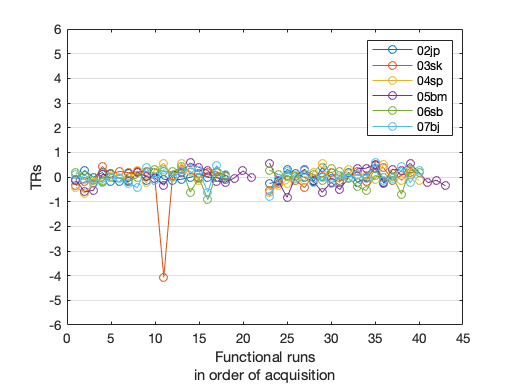

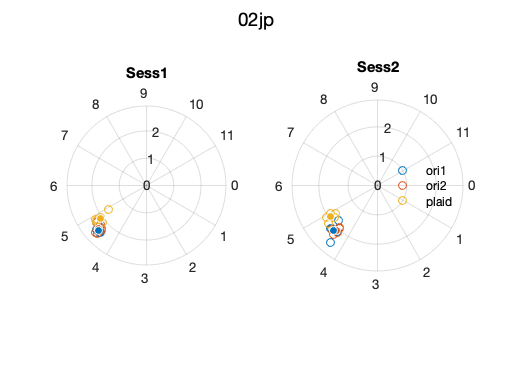

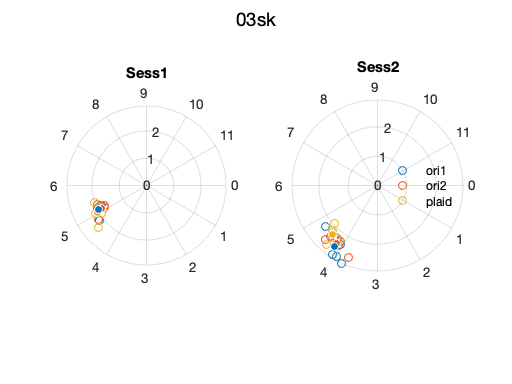

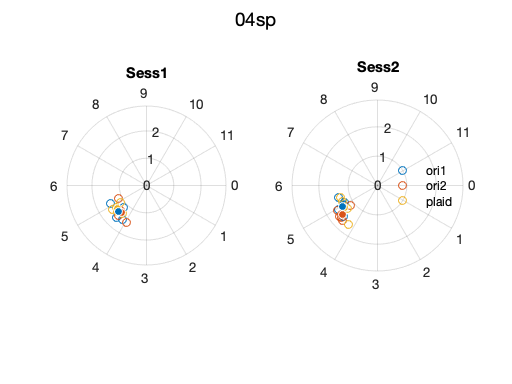

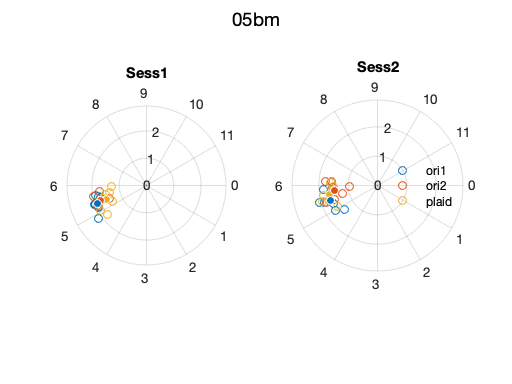

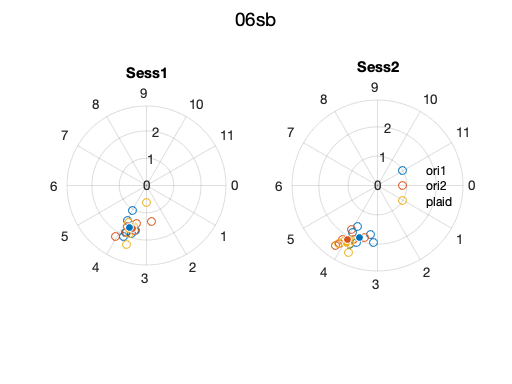

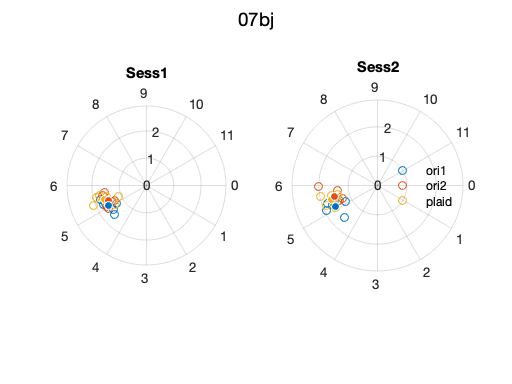

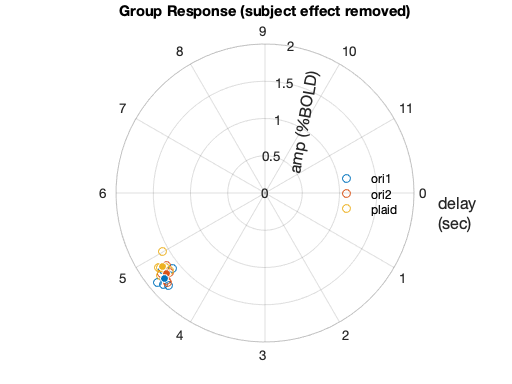

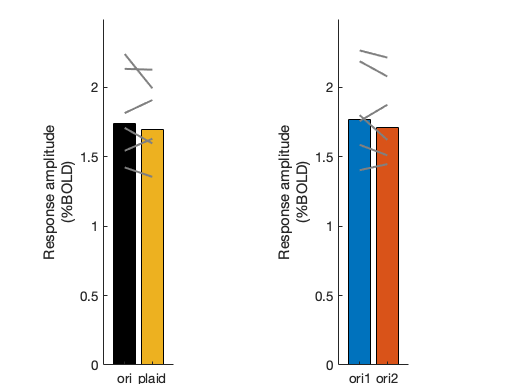

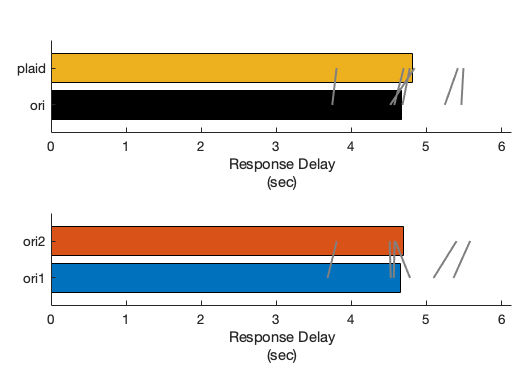

In [3]:
exclusion = sinusoidalGroupAnalysis

### Visualize the sinusoidal response in V1

IN: BOLD hemodynamic responses (HR) from anatomical V1 ROI (C-derived/DecodingHR/zHr)
F(IN)->OUT: threshold included voxels and analyse HR averaged across the ROI
OUT: figures
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/hrGroupAnalysis/02jp.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/hrGroupAnalysis/02jp.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/hrGroupAnalysis/03sk.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/hrGroupAnalysis/03sk.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/hrGroupAnalysis/04sp.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/hrGroupAnalysis/04sp.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/hrGroupAnalysis/05bm.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/hrGroupAnalysis/05bm.fig
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/hrGroupAnalysis/06sb.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging

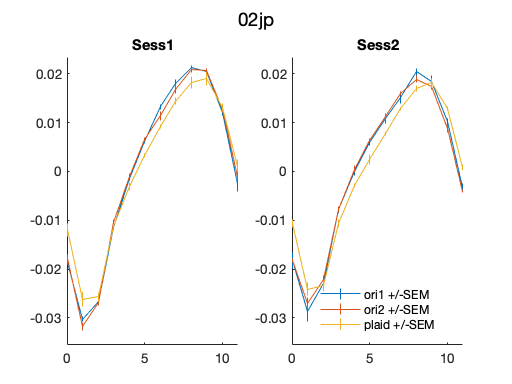

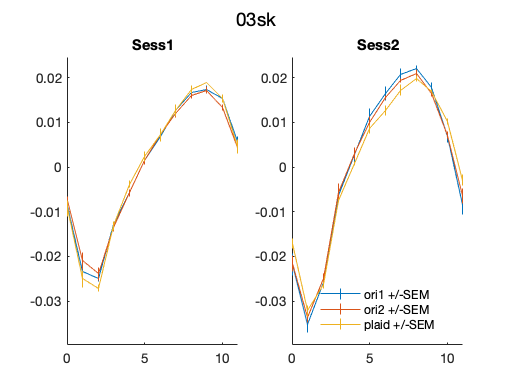

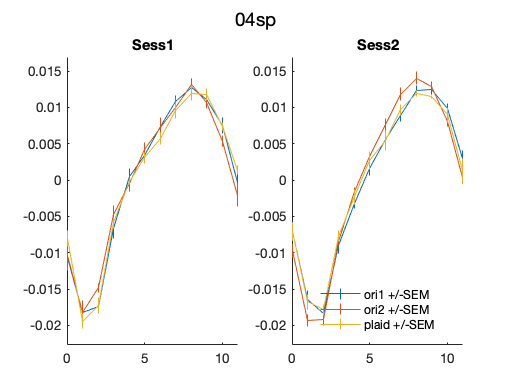

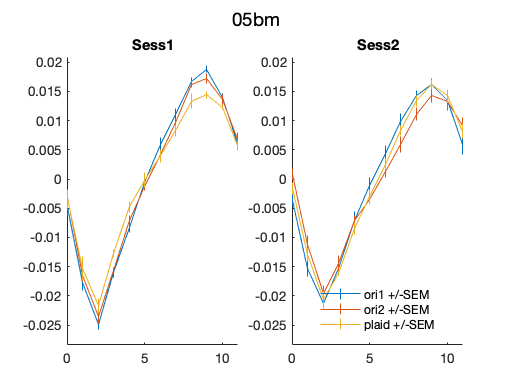

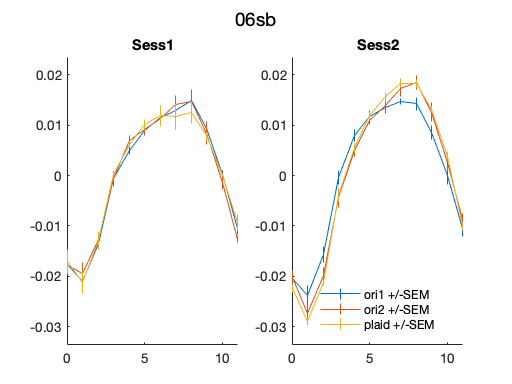

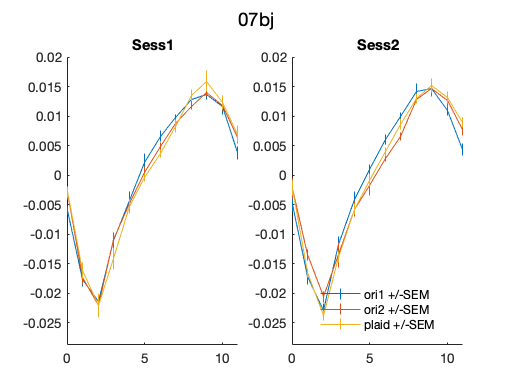

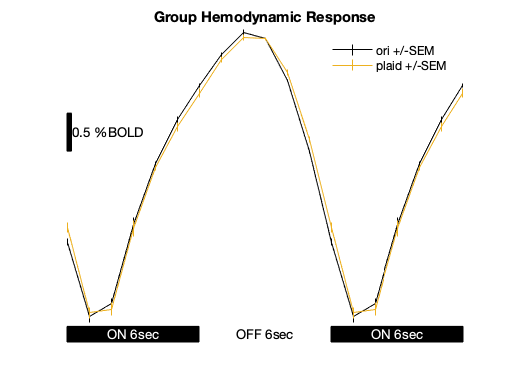

In [4]:
hrGroupAnalysis([],exclusion)

### Conclusion on Prediction 1

## Prediction 2: Stimulus orientation can be predicted not only from the multivoxel pattern of BOLD responses, but also from the pattern of BOLD delays

In [35]:
clear res

In [36]:
svmSpace = 'polMag';
resTmp = runDecoding(svmSpace,[],exclusion);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

------
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived/DecodingHR/zSin)
---
SVM space: polMag; Vox selection: respF_p
Group accuracy = 89/142 (62.7%; binomial p=0.001)
mean(nObs) =12
mean(nFeat)=1069


In [37]:
svmSpace = 'polDelay';
resTmp = runDecoding(svmSpace,[],exclusion);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

------
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived/DecodingHR/zSin)
---
SVM space: polDelay; Vox selection: respF_p
Group accuracy = 71/142 (50.0%; binomial p=0.467)
mean(nObs) =12
mean(nFeat)=1069


In [38]:
svmSpace = 'cartReal';
resTmp = runDecoding(svmSpace,[],exclusion);
disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.nObs,2),1)))])
disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.nDim,2),1)))])
res.(svmSpace) = resTmp;

------
IN: Sinusoidal BOLD responses from anatomical V1 ROI (C-derived/DecodingHR/zSin)
F(IN)=OUT: threshold included voxels and decode ROI response pattern to predict stimulus orientation
OUT: figures and stats (C-derived/DecodingHR/zSin)
---
SVM space: cartReal; Vox selection: respF_p
Group accuracy = 85/142 (59.9%; binomial p=0.007)
mean(nObs) =12
mean(nFeat)=1069


    {'polMag'}    {'polDelay'}    {'cartReal'}

signedrank   = 15.00   5.50  15.00
signedrank p = 0.0312  0.5000  0.0312
group accuracy  = 62.68%  50.00%  59.86%
binomial   p    = 0.0009   0.4666   0.0073
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/plotDecoding/acc.svg
/Users/sebastienproulx/Documents/GitHub/McGill/neuroimaging/plotDecoding/acc.fig


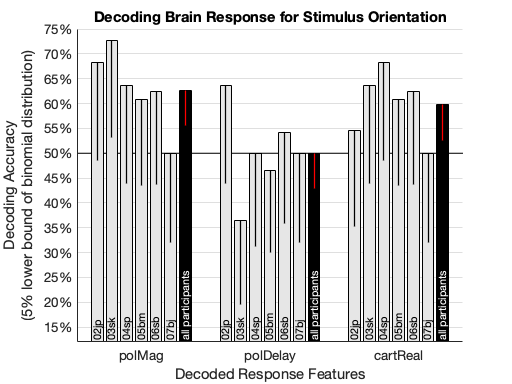

In [41]:
plotDecoding(res)

### Conclusion on Prediction 2